# Lesson 13.3 梯度不平稳性与Glorot条件




## 一、梯度消失与梯度爆炸



&emsp;&emsp;神经网络在进行反向传播的过程中，各参数层的梯度计算会涉及到激活函数导函数取值，具体来说，假设现在有一个三层的神经网络，其中两个隐藏层的激活函数为$F(x)$，对应的导函数为$f(x)$，设$X$为输入训练的数据特征，$y$为标签，$\hat y$为模型向前传播输出结果，$w_1$为第一层参数、$w_2$为第二层参数、$w_3$为第三层参数，loss为损失函数，则有如下计算公式：  
每一次正向传播计算结果：
$$\hat y = F(F(X * w_1) * w_2) * w_3$$

而loss是一个关于y和$\hat y$的函数，而y是常量，$\hat y$是一个关于w的函数，因此loss也进行如下表示：
$$loss(\hat y)$$

在进行梯度求解时候，假设$w_1$对应梯度为$grad_1$,$w_2$对应梯度为$grad_2$,$w_3$对应梯度为$grad_3$,为了简化计算，我们假设所有的$x、w_1、w_2、w_3$都是标量，根据链式法则，有计算过程如下：

\begin{aligned}
grad_1 &=\frac{\partial loss}{\partial w_1} \\
&= \frac{\partial loss}{\partial \hat y} \cdot \frac{\partial \hat y}{\partial w_1} \\
&= \frac{\partial loss}{\partial \hat y} \cdot \frac{\partial (F(F(X * w_1) * w_2) * w_3)}{\partial w_1} \\
&= \frac{\partial loss}{\partial \hat y} \cdot \frac{\partial (F(F(X * w_1) * w_2) * w_3)}{\partial (F(F(X * w_1) * w_2)} \cdot \frac{\partial F(F(X * w_1) * w_2)}{\partial F(X * w_1)} \cdot \frac{\partial F(X * w_1)}{\partial w_1}\\
&= \frac{\partial loss}{\partial \hat y} \cdot w_3 \cdot f(F(X * w_1) * w_2) \cdot w_2 \cdot f(X * w_1) \cdot X \\
\end{aligned}
$$

值得注意的是，此时$grad_1$中**计算了两次激活函数的导函数**，并且在上述过程中，$X * w_1$是第一层隐藏层接收到的数据，而$F(X*w_1)*w_2$则是第二层隐藏层接收到的数据。而对比如果是计算$w_2$的梯度，则有如下过程：
$$
\begin{aligned}
grad_2 &=\frac{\partial loss}{\partial w_2} \\
&= \frac{\partial loss}{\partial \hat y} \cdot \frac{\partial \hat y}{\partial w_2} \\
&= \frac{\partial loss}{\partial \hat y} \cdot \frac{\partial (F(F(X * w_1) * w_2) * w_3)}{\partial w_2} \\
&= \frac{\partial loss}{\partial \hat y} \cdot \frac{\partial (F(F(X * w_1) * w_2) * w_3)}{\partial (F(F(X * w_1) * w_2)} \cdot \frac{\partial F(F(X * w_1) * w_2)}{\partial w_2} \\
&= \frac{\partial loss}{\partial \hat y} 
\cdot 
w_3 \cdot \frac{\partial F(F(X * w_1) * w_2)}{\partial w_2} \\
&= \frac{\partial loss}{\partial \hat y} 
\cdot 
w_3 \cdot f(F(X*w_1)*w_2) \cdot
\frac{\partial (F(X * w_1) * w_2)}{\partial w_2} \\
&= \frac{\partial loss}{\partial \hat y} 
\cdot 
w_3 \cdot f(F(X*w_1)*w_2) \cdot
F(X * w_1) \\
\end{aligned}
$$

我们发现，在$grad_2$**计算过程中只出现了一次激活函数的导函数**。当然如果我们是计算$w_3$的梯度，则与如下计算过程：
$$
\begin{aligned}
grad_3 &=\frac{\partial loss}{\partial w_3} \\
&= \frac{\partial loss}{\partial \hat y} \cdot \frac{\partial \hat y}{\partial w_3} \\
&= \frac{\partial loss}{\partial \hat y} \cdot \frac{\partial (F(F(X * w_1) * w_2) * w_3)}{\partial w_3} \\
&= \frac{\partial loss}{\partial \hat y} \cdot F(F(X * w_1) * w_2) \\
\end{aligned}
$$

此时$grad_3$在计算过程中就已经不涉及激活函数的导函数的计算了。

其实如果当神经网络层数继续增加、激活函数的数量继续增加，
- 第一层参数在计算梯度的过程中需要相乘的激活函数导函数个数也会随之增加
- 而后面几层参数的梯度计算中涉及到的激活函数导函数个数逐级递减。

- **梯度爆炸**  
  - 累乘就容易造成指数级变化，当激活函数值$F(F(X*w_1))$、激活函数导函数值$f(X*w_1)$或者参与相乘的参数取值（$w_3$）较大(>1)时，会出现$grad_1$远大于$grad_2$远大于$grad_3$的情况，也就是神经网络前几层参数梯度非常大而后几层参数梯度相对较小的情况
  - 受到累乘效应的影响，前几层梯度也会大于甚至远大于1，此时就会造成模型迭代过程不稳定的情况发生
- **梯度消失**
  - 如果上述几个变量均小于1，甚至远小于1，则会出现前几层参数梯度非常小、而后几层参数梯度非常大的情况，此时就被称为梯度消失，此时由于模型各层参数学习率伴随层数增加逐渐增加，并且由于构成梯度的基本参数均小于1，因此最后几层梯度也会小于1甚至远小于1，此时前几层参数梯度取值将非常小，甚至趋于0，因而会使得前几层的参数无法在迭代中得到更新

## 二、Sigmoid和tanh激活函数的梯度更新问题

### 1.Sigmoid激活函数的梯度消失问题

- 理论说明  
&emsp;&emsp;对于sigmoid激活函数来说，**简答的叠加是极容易出现梯度消失**的问题。 

- `.detach()` 阶段反向传播
sigmoid函数及导函数图像如下所示： 

In [47]:
# 绘制Sigmoid函数的函数图像和导函数图像
X = torch.arange(-5, 5, 0.1)
X.requires_grad=True
sigmoid_y = torch.sigmoid(X)

In [48]:
X.detach() 
# detach()切断反向传播

tensor([-5.0000e+00, -4.9000e+00, -4.8000e+00, -4.7000e+00, -4.6000e+00,
        -4.5000e+00, -4.4000e+00, -4.3000e+00, -4.2000e+00, -4.1000e+00,
        -4.0000e+00, -3.9000e+00, -3.8000e+00, -3.7000e+00, -3.6000e+00,
        -3.5000e+00, -3.4000e+00, -3.3000e+00, -3.2000e+00, -3.1000e+00,
        -3.0000e+00, -2.9000e+00, -2.8000e+00, -2.7000e+00, -2.6000e+00,
        -2.5000e+00, -2.4000e+00, -2.3000e+00, -2.2000e+00, -2.1000e+00,
        -2.0000e+00, -1.9000e+00, -1.8000e+00, -1.7000e+00, -1.6000e+00,
        -1.5000e+00, -1.4000e+00, -1.3000e+00, -1.2000e+00, -1.1000e+00,
        -1.0000e+00, -9.0000e-01, -8.0000e-01, -7.0000e-01, -6.0000e-01,
        -5.0000e-01, -4.0000e-01, -3.0000e-01, -2.0000e-01, -1.0000e-01,
        -2.9802e-09,  1.0000e-01,  2.0000e-01,  3.0000e-01,  4.0000e-01,
         5.0000e-01,  6.0000e-01,  7.0000e-01,  8.0000e-01,  9.0000e-01,
         1.0000e+00,  1.1000e+00,  1.2000e+00,  1.3000e+00,  1.4000e+00,
         1.5000e+00,  1.6000e+00,  1.7000e+00,  1.8

In [49]:
# 反向传播
sigmoid_y.sum().backward()

<AxesSubplot:>

Text(0.5, 1.0, 'Sigmoid Function')

<AxesSubplot:>

Text(0.5, 1.0, 'Sigmoid Derivative function')

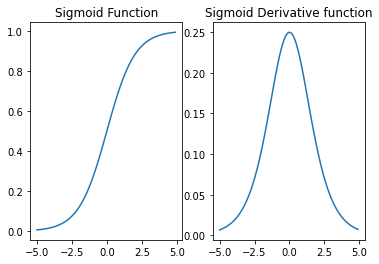

In [50]:
# Sigmoid函数图像
plt.subplot(121)
plt.plot(X.detach(), sigmoid_y.detach())
plt.title("Sigmoid Function")

# Sigmoid导函数图像
plt.subplot(122)
plt.plot(X.detach(), X.grad.detach())
plt.title("Sigmoid Derivative function")

Text(0.5, 1.0, 'Sigmoid Derivative function')

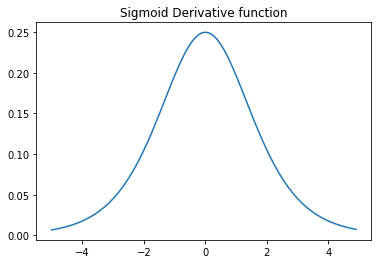

In [51]:
#————————————————————————————单独观察Sigmoid导函数————————————————————————————
plt.plot(X.detach(), X.grad.detach())
plt.title("Sigmoid Derivative function")

我们发现，Sigmoid导函数最大值为0.25（在0点处取到），当x较大或者较小时，导函数取值趋于0。      
&emsp;&emsp;此时如果我们假设还是上述结构的三层神经网络，则第一层参数梯度$grad_1$由于计算过程出现两次导函数连乘，哪怕两次都导函数都取到最大值（虽然可能性较小），$grad_1$都将在0.0625的基础上进行其余部分相乘，最终结果也极有可能是个非常小的值，因此对于Sigmoid激活函数叠加的情况来说，是极容易出现梯度消失情况的。
$$
grad_1 
= \frac{\partial loss}{\partial \hat y} 
\cdot 
w_3 \cdot f(F(X*w_1)*w_2) \cdot
w_2 \cdot f(X * w_1) \cdot X 
$$

$$
grad_2 
= \frac{\partial loss}{\partial \hat y} 
\cdot 
w_3 \cdot f(F(X*w_1)*w_2) \cdot
F(X * w_1) 
$$

$$
grad_3 = \frac{\partial loss}{\partial \hat y} 
\cdot 
F(F(X * w_1) * w_2)
$$

> 梯度消失或者梯度爆炸，始终是个概率问题。我们不能说导函数取值取值小就一定会发生梯度消失问题，只是导函数最大值越小，越有可能发生梯度消失。

- Sigmoid函数饱和区间

&emsp;&emsp;一般来说我们会将靠近sigmoid函数的左右两端的区间称为函数的饱和区间（如下图圈出部分）（也就是自变量绝对值较大的区间）.

- 当自变量落入饱和区间时，因变量会趋于0或者1，
- 而无论自变量是极小（负数绝对值极大）还是极大，都会使得导函数取值趋于0，从而更容易导致模型梯度消失。

<img src="https://i.loli.net/2021/02/24/nXN6Gq8521f7tDU.jpg" alt="64" style="zoom:50%;" />

In [53]:
#—————— Sigmoid激活函数叠加后的梯度消失问题——————

# 设置随机数种子
torch.manual_seed(420)  

# 创建最高项为2的多项式回归数据集
features, labels = tensorGenReg(w=[2, -1], bias=False, deg=2)

# 进行数据集切分与加载
train_loader, test_loader = split_loader(features, labels)

#利用三个隐藏层的Sigmoid_class3模型进行建模。


In [55]:

# 创建随机数种子
torch.manual_seed(420)  

# 实例化模型
sigmoid_model3 = Sigmoid_class3()


# 然后让我们来观察各层参数的梯度随着迭代过程变化情况

---

### <center>模型参数及梯度提取方法

&emsp;&emsp;由于需要对各线性层参数的变化情况进行观察，此处我们也简单总结此前提到的关于模型参数和及其对应梯度的提取方法。

- `.parameters()`方法观察模型所有参数,包括截距
  - 但需要使用list将其转化为显式的列表。
- 模型参数本身也是张量，并且是可微张量即可
- PyTorch会将数据转化为按列排列，一列代表一条数据
  - PyTorch中我们查看到的模型参数和推导的模型参数互为转置关系
-  `模型.module方法`，观察构成该模型的每个线性层的参数。
   -  list(模型.module()).weight or.bias 查看权重和参数
- 循环提取参数
  ``` 
  for m in sigmoid_model3.modules():  
    if isinstance(m, nn.Linear):  
        print(m.bias,m.weight)
  ```

In [56]:
pl = list(sigmoid_model3.parameters())
pl

[Parameter containing:
 tensor([[ 0.4318, -0.4256],
         [ 0.6730, -0.5617],
         [-0.2157, -0.4873],
         [ 0.5453,  0.2653]], requires_grad=True),
 Parameter containing:
 tensor([-0.3527, -0.5469, -0.4094, -0.1364], requires_grad=True),
 Parameter containing:
 tensor([1., 1., 1., 1.], requires_grad=True),
 Parameter containing:
 tensor([0., 0., 0., 0.], requires_grad=True),
 Parameter containing:
 tensor([[-0.2552,  0.3644, -0.2104, -0.3271],
         [-0.1542, -0.4883, -0.2428, -0.2728],
         [ 0.1076,  0.4066,  0.0540, -0.2914],
         [ 0.2058, -0.2129, -0.2367, -0.0958]], requires_grad=True),
 Parameter containing:
 tensor([-0.2609,  0.0550,  0.4059,  0.0682], requires_grad=True),
 Parameter containing:
 tensor([1., 1., 1., 1.], requires_grad=True),
 Parameter containing:
 tensor([0., 0., 0., 0.], requires_grad=True),
 Parameter containing:
 tensor([[ 3.0199e-01, -4.3436e-01, -3.9335e-01, -6.6525e-02],
         [ 4.5806e-04,  3.1209e-01, -4.3974e-01,  2.0861e-01

In [57]:
#————————————————————————————pytorch转置举例————————————————————————————
f = torch.tensor([[1., 2]])
f   # 行向量，代表一条数据


tensor([[1., 2.]])

In [58]:
sigmoid_model3(f)                     # 返回最终输出结果

tensor([[-0.5715]], grad_fn=<AddmmBackward0>)

In [59]:
sigmoid_model3.modules()

<generator object Module.modules at 0x000001858B677990>

In [60]:
list(sigmoid_model3.modules())

[Sigmoid_class3(
   (linear1): Linear(in_features=2, out_features=4, bias=True)
   (normalize1): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (linear2): Linear(in_features=4, out_features=4, bias=True)
   (normalize2): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (linear3): Linear(in_features=4, out_features=4, bias=True)
   (normalize3): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (linear4): Linear(in_features=4, out_features=1, bias=True)
 ),
 Linear(in_features=2, out_features=4, bias=True),
 BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 Linear(in_features=4, out_features=4, bias=True),
 BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 Linear(in_features=4, out_features=4, bias=True),
 BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 Linear(in_features=4, out_features=1, bias

In [61]:
list(sigmoid_model3.modules())[1]
# 返回第二个tensor

Linear(in_features=2, out_features=4, bias=True)

In [62]:
list(sigmoid_model3.modules())[1](f)  # 返回模型第一层输出结果

tensor([[-0.7721, -0.9973, -1.5997,  0.9395]], grad_fn=<AddmmBackward0>)

In [63]:
pl

[Parameter containing:
 tensor([[ 0.4318, -0.4256],
         [ 0.6730, -0.5617],
         [-0.2157, -0.4873],
         [ 0.5453,  0.2653]], requires_grad=True),
 Parameter containing:
 tensor([-0.3527, -0.5469, -0.4094, -0.1364], requires_grad=True),
 Parameter containing:
 tensor([1., 1., 1., 1.], requires_grad=True),
 Parameter containing:
 tensor([0., 0., 0., 0.], requires_grad=True),
 Parameter containing:
 tensor([[-0.2552,  0.3644, -0.2104, -0.3271],
         [-0.1542, -0.4883, -0.2428, -0.2728],
         [ 0.1076,  0.4066,  0.0540, -0.2914],
         [ 0.2058, -0.2129, -0.2367, -0.0958]], requires_grad=True),
 Parameter containing:
 tensor([-0.2609,  0.0550,  0.4059,  0.0682], requires_grad=True),
 Parameter containing:
 tensor([1., 1., 1., 1.], requires_grad=True),
 Parameter containing:
 tensor([0., 0., 0., 0.], requires_grad=True),
 Parameter containing:
 tensor([[ 3.0199e-01, -4.3436e-01, -3.9335e-01, -6.6525e-02],
         [ 4.5806e-04,  3.1209e-01, -4.3974e-01,  2.0861e-01

In [64]:
torch.mm(f, pl[0].t()) + pl[1].t()     # 手动实现第一层的输出结果
# 手动处理是需要对pl进行转置
# 就等于list(sigmoid_model3.modules())[1](f)  返回模型第一层输出结果

tensor([[-0.7721, -0.9973, -1.5997,  0.9395]], grad_fn=<AddBackward0>)

- `.module方法`，观察构成该模型的每个线性层的参数。

In [65]:
#—————————————————.module方法 观察每个线性层的参数——————————————————
ml = list(sigmoid_model3.modules())
ml
# ml中，除了第一个元素是自定义的类以外，其他的都是构成模型的线性层。

[Sigmoid_class3(
   (linear1): Linear(in_features=2, out_features=4, bias=True)
   (normalize1): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (linear2): Linear(in_features=4, out_features=4, bias=True)
   (normalize2): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (linear3): Linear(in_features=4, out_features=4, bias=True)
   (normalize3): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (linear4): Linear(in_features=4, out_features=1, bias=True)
 ),
 Linear(in_features=2, out_features=4, bias=True),
 BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 Linear(in_features=4, out_features=4, bias=True),
 BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 Linear(in_features=4, out_features=4, bias=True),
 BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 Linear(in_features=4, out_features=1, bias

In [66]:
list(ml[0].parameters())                  # ml中第一个元素和模型相同

[Parameter containing:
 tensor([[ 0.4318, -0.4256],
         [ 0.6730, -0.5617],
         [-0.2157, -0.4873],
         [ 0.5453,  0.2653]], requires_grad=True),
 Parameter containing:
 tensor([-0.3527, -0.5469, -0.4094, -0.1364], requires_grad=True),
 Parameter containing:
 tensor([1., 1., 1., 1.], requires_grad=True),
 Parameter containing:
 tensor([0., 0., 0., 0.], requires_grad=True),
 Parameter containing:
 tensor([[-0.2552,  0.3644, -0.2104, -0.3271],
         [-0.1542, -0.4883, -0.2428, -0.2728],
         [ 0.1076,  0.4066,  0.0540, -0.2914],
         [ 0.2058, -0.2129, -0.2367, -0.0958]], requires_grad=True),
 Parameter containing:
 tensor([-0.2609,  0.0550,  0.4059,  0.0682], requires_grad=True),
 Parameter containing:
 tensor([1., 1., 1., 1.], requires_grad=True),
 Parameter containing:
 tensor([0., 0., 0., 0.], requires_grad=True),
 Parameter containing:
 tensor([[ 3.0199e-01, -4.3436e-01, -3.9335e-01, -6.6525e-02],
         [ 4.5806e-04,  3.1209e-01, -4.3974e-01,  2.0861e-01

In [67]:
ml[1]                       # 其他元素都是线性层

Linear(in_features=2, out_features=4, bias=True)

In [68]:
list(ml[1].parameters())

[Parameter containing:
 tensor([[ 0.4318, -0.4256],
         [ 0.6730, -0.5617],
         [-0.2157, -0.4873],
         [ 0.5453,  0.2653]], requires_grad=True),
 Parameter containing:
 tensor([-0.3527, -0.5469, -0.4094, -0.1364], requires_grad=True)]

线性层可以使用weight返回其自变量权重，通过bias返回其截距

In [69]:
ml[1].weight

Parameter containing:
tensor([[ 0.4318, -0.4256],
        [ 0.6730, -0.5617],
        [-0.2157, -0.4873],
        [ 0.5453,  0.2653]], requires_grad=True)

In [70]:
ml[1].bias

Parameter containing:
tensor([-0.3527, -0.5469, -0.4094, -0.1364], requires_grad=True)

In [71]:
ml[1](f)

tensor([[-0.7721, -0.9973, -1.5997,  0.9395]], grad_fn=<AddmmBackward0>)

In [72]:
ml[0].bias

AttributeError: 'Sigmoid_class3' object has no attribute 'bias'

In [ ]:
sigmoid_model3(f)[1] 

IndexError: index 1 is out of bounds for dimension 0 with size 1

因此，我们目前所使用的模型，也可以称为线性层叠加模型。不过这种通过线性层模块单独提取参数的方法需要注意，每一个线性层的weight和bias（如果有的话）是单独的属性，实际建模过程中需要视情况提取weight或者bias。

In [73]:
# 提取weight
for m in sigmoid_model3.modules():
    if isinstance(m, nn.Linear):
        print(m.weight)

Parameter containing:
tensor([[ 0.4318, -0.4256],
        [ 0.6730, -0.5617],
        [-0.2157, -0.4873],
        [ 0.5453,  0.2653]], requires_grad=True)
Parameter containing:
tensor([[-0.2552,  0.3644, -0.2104, -0.3271],
        [-0.1542, -0.4883, -0.2428, -0.2728],
        [ 0.1076,  0.4066,  0.0540, -0.2914],
        [ 0.2058, -0.2129, -0.2367, -0.0958]], requires_grad=True)
Parameter containing:
tensor([[ 3.0199e-01, -4.3436e-01, -3.9335e-01, -6.6525e-02],
        [ 4.5806e-04,  3.1209e-01, -4.3974e-01,  2.0861e-01],
        [-4.2916e-01,  8.0655e-02,  3.3044e-01,  6.8971e-02],
        [ 1.5964e-01,  3.1789e-01,  4.9465e-01, -3.1377e-01]],
       requires_grad=True)
Parameter containing:
tensor([[-0.3468, -0.4897,  0.2213,  0.4947]], requires_grad=True)


In [74]:
# 提取weight
for m in sigmoid_model3.modules():
    if isinstance(m, nn.Linear):
        print(m.bias)

Parameter containing:
tensor([-0.3527, -0.5469, -0.4094, -0.1364], requires_grad=True)
Parameter containing:
tensor([-0.2609,  0.0550,  0.4059,  0.0682], requires_grad=True)
Parameter containing:
tensor([ 0.1638,  0.4116,  0.2843, -0.4529], requires_grad=True)
Parameter containing:
tensor([-0.4843], requires_grad=True)


当然，我们也可直接使用.grad查看梯度。但由于目前模型还未训练，因此返回结果为None。后续查看每一个线性层梯度时可以使用如下方法：

In [75]:
# 提取weight
for m in sigmoid_model3.modules():
    if isinstance(m, nn.Linear):
        print(m.weight.grad)

None
None
None
None


有了上述基础知识铺垫之后，即可开始后续的学习。

---

接下来，对模型进行训练，在遍历五次数据后，观察参数变化情况。

In [76]:
# 5次遍历
fit(net = sigmoid_model3, 
    criterion = nn.MSELoss(), 
    optimizer = optim.SGD(sigmoid_model3.parameters(), lr = 0.03), 
    batchdata = train_loader, 
    epochs=5, 
    cla=False)

In [84]:
# 循环取出3层激活函数为sigmoid的神经网络模型的参数

for m in sigmoid_model3.modules():
    if isinstance(m, nn.Linear):
        print(m.weight)


# 第一层线性层参数变化非常小，而最后一层参数值变化较大。

Parameter containing:
tensor([[ 0.4372, -0.4246],
        [ 0.7055, -0.5486],
        [-0.2128, -0.4854],
        [ 0.5289,  0.2731]], requires_grad=True)
Parameter containing:
tensor([[-0.2624,  0.3539, -0.2097, -0.3360],
        [-0.1441, -0.4683, -0.2514, -0.2627],
        [ 0.1494,  0.4727,  0.0456, -0.2496],
        [ 0.1916, -0.2341, -0.2344, -0.1131]], requires_grad=True)
Parameter containing:
tensor([[ 0.2618, -0.4739, -0.4603, -0.1163],
        [-0.0543,  0.2618, -0.5319,  0.1416],
        [-0.4360,  0.0395,  0.3270,  0.0522],
        [ 0.1733,  0.2853,  0.5280, -0.3078]], requires_grad=True)
Parameter containing:
tensor([[-0.0287, -0.1232,  0.5845,  0.7604]], requires_grad=True)


由于我们定义的fit函数是在每一轮开始时将梯度清零，而每一轮迭代结束时还会保留梯度，因此我们可以直接使用.grad查看当前各层参数梯度情况。

In [86]:
for m in sigmoid_model3.modules():
    if isinstance(m, nn.Linear):
        print(m.weight.grad)

# 前几层梯度较小，后几层梯度较大

tensor([[-0.0043, -0.0027],
        [-0.0176, -0.0117],
        [-0.0040, -0.0021],
        [ 0.0098,  0.0052]])
tensor([[ 0.0062,  0.0077, -0.0007,  0.0115],
        [-0.0107, -0.0133,  0.0014, -0.0202],
        [-0.0341, -0.0421,  0.0027, -0.0627],
        [ 0.0124,  0.0154, -0.0012,  0.0229]])
tensor([[ 0.0066,  0.0060,  0.0113,  0.0083],
        [ 0.0209,  0.0191,  0.0359,  0.0265],
        [-0.0773, -0.0708, -0.1329, -0.0979],
        [-0.1050, -0.0960, -0.1804, -0.1329]])
tensor([[-0.6299, -0.7897, -0.8889, -0.7292]])


In [92]:
#————————————————————————————梯度可视化-小提琴图————————————————————————————
import seaborn as sns              # 导入seaborn绘图包，后续需要将其添加进启动项

vp = []                            # 创建空列表用于存储每一层参数的梯度

for i, m in enumerate(sigmoid_model3.modules()):
    if isinstance(m, nn.Linear):   # 只要是线性层就执行下面的代码
        vp_x = m.weight.grad.detach().reshape(-1, 1).numpy()             # 每一层参数梯度
        vp_y = np.full_like(vp_x, i)                                     # 对层进行标记
        vp_a = np.concatenate((vp_x, vp_y), 1)
        vp.append(vp_a)

vp

[array([[-0.00434157,  1.        ],
        [-0.00269753,  1.        ],
        [-0.01757523,  1.        ],
        [-0.01171168,  1.        ],
        [-0.00395311,  1.        ],
        [-0.00208129,  1.        ],
        [ 0.00981918,  1.        ],
        [ 0.0052211 ,  1.        ]], dtype=float32),
 array([[ 6.23247027e-03,  3.00000000e+00],
        [ 7.73869036e-03,  3.00000000e+00],
        [-6.50476199e-04,  3.00000000e+00],
        [ 1.15341265e-02,  3.00000000e+00],
        [-1.06804930e-02,  3.00000000e+00],
        [-1.33101307e-02,  3.00000000e+00],
        [ 1.41562056e-03,  3.00000000e+00],
        [-2.02342980e-02,  3.00000000e+00],
        [-3.41279954e-02,  3.00000000e+00],
        [-4.21172231e-02,  3.00000000e+00],
        [ 2.70337984e-03,  3.00000000e+00],
        [-6.27222657e-02,  3.00000000e+00],
        [ 1.24284420e-02,  3.00000000e+00],
        [ 1.54135972e-02,  3.00000000e+00],
        [-1.21727260e-03,  3.00000000e+00],
        [ 2.29195952e-02,  3.000000

In [93]:
vp_r = np.concatenate((vp), 0)                                            # 拼接行
vp_r

array([[-4.34157113e-03,  1.00000000e+00],
       [-2.69753439e-03,  1.00000000e+00],
       [-1.75752304e-02,  1.00000000e+00],
       [-1.17116831e-02,  1.00000000e+00],
       [-3.95311322e-03,  1.00000000e+00],
       [-2.08128663e-03,  1.00000000e+00],
       [ 9.81917605e-03,  1.00000000e+00],
       [ 5.22110006e-03,  1.00000000e+00],
       [ 6.23247027e-03,  3.00000000e+00],
       [ 7.73869036e-03,  3.00000000e+00],
       [-6.50476199e-04,  3.00000000e+00],
       [ 1.15341265e-02,  3.00000000e+00],
       [-1.06804930e-02,  3.00000000e+00],
       [-1.33101307e-02,  3.00000000e+00],
       [ 1.41562056e-03,  3.00000000e+00],
       [-2.02342980e-02,  3.00000000e+00],
       [-3.41279954e-02,  3.00000000e+00],
       [-4.21172231e-02,  3.00000000e+00],
       [ 2.70337984e-03,  3.00000000e+00],
       [-6.27222657e-02,  3.00000000e+00],
       [ 1.24284420e-02,  3.00000000e+00],
       [ 1.54135972e-02,  3.00000000e+00],
       [-1.21727260e-03,  3.00000000e+00],
       [ 2.

In [94]:
vp_r[:, 0]                                                                # 每一层梯度

array([-4.34157113e-03, -2.69753439e-03, -1.75752304e-02, -1.17116831e-02,
       -3.95311322e-03, -2.08128663e-03,  9.81917605e-03,  5.22110006e-03,
        6.23247027e-03,  7.73869036e-03, -6.50476199e-04,  1.15341265e-02,
       -1.06804930e-02, -1.33101307e-02,  1.41562056e-03, -2.02342980e-02,
       -3.41279954e-02, -4.21172231e-02,  2.70337984e-03, -6.27222657e-02,
        1.24284420e-02,  1.54135972e-02, -1.21727260e-03,  2.29195952e-02,
        6.57502795e-03,  6.01594104e-03,  1.13007063e-02,  8.32437817e-03,
        2.08900459e-02,  1.91117562e-02,  3.59029286e-02,  2.64517665e-02,
       -7.73131177e-02, -7.07545653e-02, -1.32862583e-01, -9.78987515e-02,
       -1.04970917e-01, -9.60440412e-02, -1.80402294e-01, -1.32922396e-01,
       -6.29937828e-01, -7.89685071e-01, -8.88871133e-01, -7.29246438e-01],
      dtype=float32)

[Text(0.5, 0, 'num_hidden'), Text(0.5, 1.0, 'Gradients')]

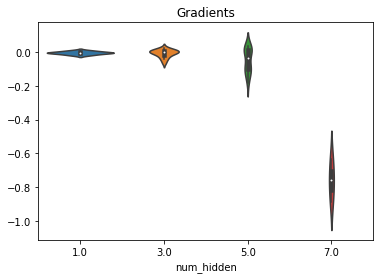

In [95]:
# violinplot(y , x )

ax = sns.violinplot(y = vp_r[:, 0], x = vp_r[:, 1])
ax.set(xlabel='num_hidden', title='Gradients')

> 小提琴图其实是一种统计分析图像，基本含义如下所示：      
<img src="https://i.loli.net/2021/03/05/9PjexWrtn3J5yHm.jpg" alt="69" style="zoom:40%;" />

当然，为了更加全面的观测模型迭代过程中数据和参数的变化情况，我们继续添加用于观测每一层输入数据（也被称为扇入数据）、激活函数处理后的输出数据（也被称为扇出数据）以及每一个线性层自身参数情况的小提琴图。

[Text(0.5, 0, 'num_hidden'), Text(0.5, 1.0, 'weights')]

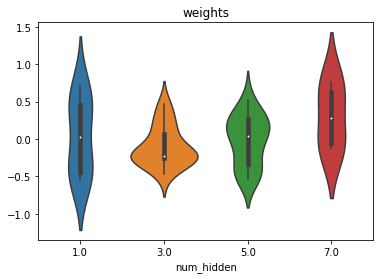

In [96]:
vp = []

for i, m in enumerate(sigmoid_model3.modules()):
    if isinstance(m, nn.Linear):
        vp_x = m.weight.detach().reshape(-1, 1).numpy()
        vp_y = np.full_like(vp_x, i)
        vp_a = np.concatenate((vp_x, vp_y), 1)
        vp.append(vp_a)
        
vp_r = np.concatenate((vp), 0)

ax = sns.violinplot(y = vp_r[:, 0], x = vp_r[:, 1])
ax.set(xlabel='num_hidden', title='weights')

In [97]:
#————————————————————————————分装小提琴图————————————————————————————

def weights_vp(model, att="grad"):
    """观察各层参数取值和梯度的小提琴图绘图函数。
    
    :param model：观察对象（模型）
    :param att：选择参数梯度（grad）还是参数取值（weights）进行观察
    :return: 对应att的小提琴图    
    """
    vp = []
    for i, m in enumerate(model.modules()):
        if isinstance(m, nn.Linear):
            if att == "grad":
                vp_x = m.weight.grad.detach().reshape(-1, 1).numpy()
            else:
                vp_x = m.weight.detach().reshape(-1, 1).numpy()
            vp_y = np.full_like(vp_x, i)
            vp_a = np.concatenate((vp_x, vp_y), 1)
            vp.append(vp_a)
    vp_r = np.concatenate((vp), 0)
    ax = sns.violinplot(y = vp_r[:, 0], x = vp_r[:, 1])
    ax.set(xlabel='num_hidden', title=att)

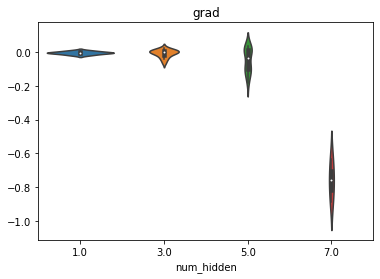

In [98]:
#———————————————————————————测试函数性能————————————————————————————
weights_vp(sigmoid_model3, att="grad")

# 梯度消失

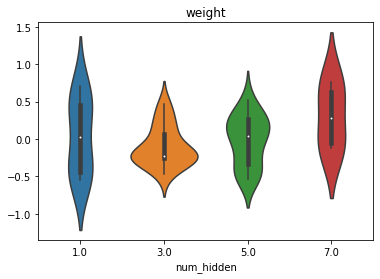

In [99]:
weights_vp(sigmoid_model3, att="weight")

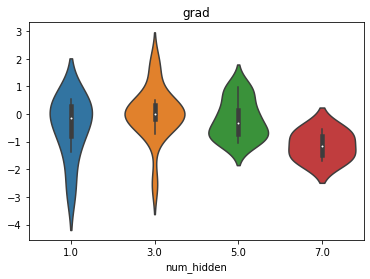

In [102]:
#————————————————————————————增加迭代次数————————————————————————————
# 对于Sigmoid激活函数的梯度消失问题，
# 是伴随着迭代次数增加或者隐藏层增加会愈发明显。

fit(net = sigmoid_model3, 
    criterion = nn.MSELoss(), 
    optimizer = optim.SGD(sigmoid_model3.parameters(), lr = 0.03), 
    batchdata = train_loader, 
    epochs=20, 
    cla=False)

weights_vp(sigmoid_model3, att="grad")

至此，我们也可以借助上述理论理解 Lesson 13.2中Sigmoid激活函数叠加之后所呈现出的状态。

<img src="https://i.loli.net/2021/03/05/pJ9xEcZKXkHNd7l.jpg" alt="67" style="zoom:40%;" />

- Sigmoid激活函数叠加会造成严重梯度消失问题

> 需要注意的是，对于复杂模型来说，如果部分层失去学习能力（参数迭代的可能性），其实模型判别效力就和简单模型无异。

### 2.tanh函数的梯度计算问题



In [103]:
# 绘制tanh函数的函数图像和导函数图像
X = torch.arange(-5, 5, 0.1)
X.requires_grad=True
tanh_y = torch.tanh(X)

In [104]:
# 反向传播
tanh_y.sum().backward()

<AxesSubplot:>

Text(0.5, 1.0, 'tanh Function')

<AxesSubplot:>

Text(0.5, 1.0, 'tanh Derivative function')

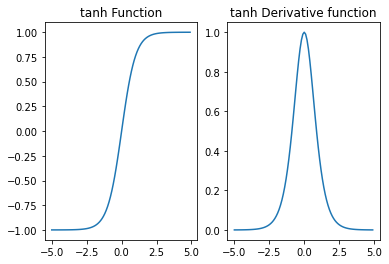

In [105]:
# tanh函数图像
plt.subplot(121)
plt.plot(X.detach(), tanh_y.detach())
plt.title("tanh Function")
# tanh导函数图像
plt.subplot(122)
plt.plot(X.detach(), X.grad.detach())
plt.title("tanh Derivative function")

对于tanh函数来说，导函数的取值分布在0-1之间的，看似导函数取值累乘之后也是趋于0的
- tanh激活函数的叠加即可能造成梯度消失、同时也可能造成梯度爆炸，
- 原因是在实际建模过程中，影响前几层梯度的其他变量大多数情况都大于1，因此对于一个导函数极大值可以取到1的激活函数来说，还是有可能出现梯度爆炸的情况的。


和Sigmoid激活函数一样，我们可以通过绘制小提琴图观察多轮迭代后，tanh激活函数叠加的神经网络是否会出现梯度消失或者梯度爆炸的情况。

In [106]:
# 创建随机数种子
torch.manual_seed(420)  

# 实例化模型
tanh_model4 = tanh_class4()

In [107]:
# 观察各层参数
for m in tanh_model4.modules():
    if isinstance(m, nn.Linear):
        print(m.weight)

Parameter containing:
tensor([[ 0.4318, -0.4256],
        [ 0.6730, -0.5617],
        [-0.2157, -0.4873],
        [ 0.5453,  0.2653]], requires_grad=True)
Parameter containing:
tensor([[-0.2552,  0.3644, -0.2104, -0.3271],
        [-0.1542, -0.4883, -0.2428, -0.2728],
        [ 0.1076,  0.4066,  0.0540, -0.2914],
        [ 0.2058, -0.2129, -0.2367, -0.0958]], requires_grad=True)
Parameter containing:
tensor([[ 3.0199e-01, -4.3436e-01, -3.9335e-01, -6.6525e-02],
        [ 4.5806e-04,  3.1209e-01, -4.3974e-01,  2.0861e-01],
        [-4.2916e-01,  8.0655e-02,  3.3044e-01,  6.8971e-02],
        [ 1.5964e-01,  3.1789e-01,  4.9465e-01, -3.1377e-01]],
       requires_grad=True)
Parameter containing:
tensor([[-0.3468, -0.4897,  0.2213,  0.4947],
        [-0.4843,  0.3998, -0.4678, -0.0610],
        [ 0.4057, -0.0786,  0.0555,  0.3645],
        [-0.4194,  0.1265, -0.2440,  0.4589]], requires_grad=True)
Parameter containing:
tensor([[-0.2952,  0.1712, -0.3926,  0.2928]], requires_grad=True)


In [108]:
# 模型训练
train_l, test_l = model_train_test(tanh_model4, 
                                   train_loader,
                                   test_loader,
                                   num_epochs = 5, 
                                   criterion = nn.MSELoss(), 
                                   optimizer = optim.SGD, 
                                   lr = 0.03, 
                                   cla = False, 
                                   eva = mse_cal)

In [112]:
# 观察各层参数
for m in tanh_model4.modules():
    if isinstance(m, nn.Linear):
        print(m.weight)

Parameter containing:
tensor([[ 1.1321,  0.1401],
        [ 1.4148, -1.0843],
        [-0.8652, -0.7889],
        [ 1.0590,  0.3490]], requires_grad=True)
Parameter containing:
tensor([[-0.7796, -0.2539, -0.5477, -1.1079],
        [ 0.3402, -0.5710, -0.7013,  0.5105],
        [ 0.5693,  1.2537, -0.1661, -0.1907],
        [ 0.3962, -0.4693, -0.7910,  0.5956]], requires_grad=True)
Parameter containing:
tensor([[ 1.1364, -0.2416, -1.4214, -0.1419],
        [-0.0820,  0.8833, -0.8995,  0.7879],
        [-0.3115,  0.6183,  0.4703,  0.6605],
        [ 0.5996, -0.0403,  0.6280, -0.6681]], requires_grad=True)
Parameter containing:
tensor([[-0.3349, -1.2463, -0.0172,  0.9945],
        [-1.0830,  0.8791, -1.1164,  0.0496],
        [ 1.6501, -0.1046, -0.4506,  0.1991],
        [-1.3820,  0.5965,  0.0022,  0.4324]], requires_grad=True)
Parameter containing:
tensor([[-3.1579,  1.3588, -2.2649,  1.4481]], requires_grad=True)


In [110]:
# 观察各层梯度
for m in tanh_model4.modules():
    if isinstance(m, nn.Linear):
        print(m.weight.grad)

tensor([[-0.0118, -0.0145],
        [ 0.0416,  0.0907],
        [ 0.8361, -0.7130],
        [-0.0128, -0.0145]])
tensor([[-0.0019,  0.0009, -0.0028, -0.0022],
        [-0.0082, -0.1836,  0.1769,  0.0020],
        [ 0.1639,  0.0542,  0.0732,  0.1693],
        [ 0.0102, -0.2402,  0.1732,  0.0225]])
tensor([[-0.0050, -0.0053,  0.0352, -0.0020],
        [ 0.1564, -0.0706, -0.1383, -0.0970],
        [-0.2504, -0.0027,  0.0131, -0.0234],
        [ 0.0651,  0.0124, -0.0330,  0.0093]])
tensor([[-0.0563, -0.0420,  0.0375,  0.0051],
        [ 0.4326,  0.3765, -0.0568, -0.0833],
        [-0.0473, -0.0441, -0.0137,  0.0245],
        [ 0.2768,  0.2377, -0.0527, -0.0723]])
tensor([[-0.4638,  0.0120,  0.4623, -0.3666]])


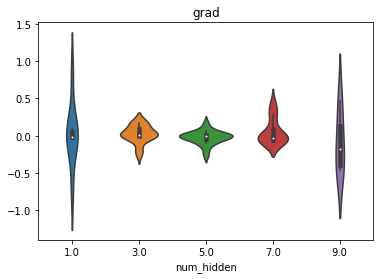

In [113]:
weights_vp(tanh_model4, att="grad")

# 能够看出，上述模型存在一定程度的梯度爆炸的情况
# tanh激活函数来说，由于激活函数本身的良好特性（也就是能够输出Zero-Centered Data），一般不会出现典型的梯度消失情况。

In [115]:
#————————————————————————————增加迭代次数num_epochs————————————————————————————
# 创建随机数种子
torch.manual_seed(420)  

# 实例化模型
tanh_model4 = tanh_class4()


train_l, test_l = model_train_test(tanh_model4, 
                                   train_loader,
                                   test_loader,
                                   num_epochs = 20, 
                                   criterion = nn.MSELoss(), 
                                   optimizer = optim.SGD, 
                                   lr = 0.03, 
                                   cla = False, 
                                   eva = mse_cal)

In [116]:
# 观察各层梯度
for m in tanh_model4.modules():
    if isinstance(m, nn.Linear):
        print(m.weight.grad)

tensor([[ 0.0167,  0.0085],
        [-0.0805, -0.0815],
        [ 0.0047, -0.0015],
        [-0.3287,  0.2189]])
tensor([[ 0.0214, -0.0162,  0.0218, -0.0211],
        [ 0.0018, -0.0018,  0.0018, -0.0002],
        [-0.1403, -0.2021, -0.1394, -0.1057],
        [ 0.1215, -0.1181,  0.1192, -0.0338]])
tensor([[ 5.5192e-01,  5.4726e-01,  5.1528e-01, -5.2743e-01],
        [-2.3484e-01, -2.3468e-01, -2.1165e-01,  1.9032e-01],
        [ 5.2956e-01,  5.2952e-01,  2.7743e-01, -4.9852e-01],
        [ 1.1726e-07,  1.1774e-07,  7.3375e-08, -3.1123e-08]])
tensor([[ 3.7853e-04,  3.0675e-04,  3.6342e-04,  4.0103e-04],
        [-1.2340e-02,  3.1772e-02,  3.1705e-02,  3.1585e-02],
        [ 2.6110e-04, -4.9287e-04, -4.7932e-04, -4.7515e-04],
        [-4.2828e-01, -5.2265e-01, -5.7503e-01, -6.4345e-01]])
tensor([[ 0.1792,  0.1835, -0.1794,  0.0483]])


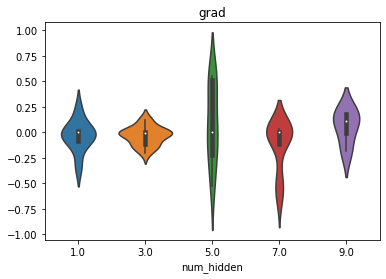

In [117]:
weights_vp(tanh_model4, att="grad")

# 梯度分布不均匀

我们发现，随着迭代次数增加，这种梯度爆炸的情况有增无减。从该角度出发，我们也能理解为何tanh4在Lesson 13.2中迭代过程如此不平稳的原因

<img src="https://i.loli.net/2021/03/05/ylxkEVm8qH3jwJT.jpg" alt="68" style="zoom:40%;" />


从根本上来说，tanh激活函数的迭代不平稳就是因为部分层的部分梯度存在极端值，当然，这种极端值也导致部分层无法有效学习、最终影响模型效果。

## 三、Zero-Centered Data与Glorot条件

### 1.Zero-centered Data

&emsp;&emsp;首先，我们还是假设当前模型是一个三层神经网络，其中两个隐藏层的激活函数为$F(x)$，对应的导函数为$f(x)$，设X为输入训练的数据特征，y为标签，$\hat y$为模型向前传播输出结果，$w_1$为第一层参数、$w_2$为第二层参数、$w_3$为第三层参数，loss为损失函数，则有如下计算公式：

每一次正向传播计算结果：
$$\hat y = F(F(X * w_1) * w_2) * w_3$$

假设$Z_i$为第i层接收到的数据，$P_i$为第i层输出的数据，则有：
$$Z_1 = X*w_1$$
$$P_1 = F(Z_1) = F(X*w_1)$$
$$Z_2 = P_1 * w_2 = F(X*w_1)*w_2$$
$$P_2 = F(Z_2) = F(F(X*w_1)*w_2)$$
$$Z_3 = \hat y = F(F(X * w_1) * w_2) * w_3$$

依次类推。而在反向传播过程，各参数层的梯度如下

$$
grad_1 
= \frac{\partial loss}{\partial \hat y} 
\cdot 
w_3 \cdot f(F(X*w_1)*w_2) \cdot
w_2 \cdot f(X * w_1) \cdot X 
$$

$$
grad_2 
= \frac{\partial loss}{\partial \hat y} 
\cdot 
w_3 \cdot f(F(X*w_1)*w_2) \cdot
F(X * w_1) 
$$

$$
grad_3 = \frac{\partial loss}{\partial \hat y} 
\cdot 
F(F(X * w_1) * w_2)
$$

&emsp;&emsp;在梯度消失和梯度爆炸的案例中，我们不难发现，为了确保多层神经网络的有效性，各层梯度的差距不应太大，此时一个最为基本的想法就是，就是能否让所有的输入数据（也就是X）以及所有层的参数都设置为Zero-Centered Data，也就是**零点对称数据**。

由于X和$w_i$都是零点对称的，因此每一个线性层中的导函数也取值也能够维持在0-1之间，进而每一层的梯度基本能维持在比较平稳的状态

In [119]:
# 既然是创建Zero-Centered参数，那能否创建初始值全是0的参数呢

class Sigmoid_class1_test(nn.Module):                                   
    def __init__(self, in_features=2, n_hidden=2, out_features=1, bias=False):       
        super(Sigmoid_class1_test, self).__init__()
        self.linear1 = nn.Linear(in_features, n_hidden, bias=bias)
        self.linear2 = nn.Linear(n_hidden, out_features, bias=bias)
        
    def forward(self, x):                                   
        z1 = self.linear1(x)
        p1 = torch.sigmoid(z1)                   
        out = self.linear2(p1)
        return out

# 创建随机数种子
torch.manual_seed(420) 

# 创建模型
sigmoid_test = Sigmoid_class1_test()

In [120]:
# 观察各层参数
list(sigmoid_test.parameters())

[Parameter containing:
 tensor([[ 0.4318, -0.4256],
         [ 0.6730, -0.5617]], requires_grad=True),
 Parameter containing:
 tensor([[-0.2157, -0.4873]], requires_grad=True)]

In [121]:
# 将各层参数修改为0
list(sigmoid_test.parameters())[0].data = torch.tensor([[0., 0], [0, 0]])
list(sigmoid_test.parameters())[1].data = torch.tensor([[0., 0]])

In [122]:
# 查看修改结果
list(sigmoid_test.parameters())

[Parameter containing:
 tensor([[0., 0.],
         [0., 0.]], requires_grad=True),
 Parameter containing:
 tensor([[0., 0.]], requires_grad=True)]

> 或者也可以通过`torch.full_like(list(sigmoid_test.parameters())[0], 0)`进行修改，然后再令其可导并替换原始参数值。

In [123]:
# 遍历五次查看结果
fit(net = sigmoid_test, 
    criterion = nn.MSELoss(), 
    optimizer = optim.SGD(sigmoid_test.parameters(), lr = 0.03), 
    batchdata = train_loader, 
    epochs=5, 
    cla=False)

In [124]:
list(sigmoid_test.parameters())

[Parameter containing:
 tensor([[ 0.6172, -0.0184],
         [ 0.6172, -0.0184]], requires_grad=True),
 Parameter containing:
 tensor([[0.9556, 0.9556]], requires_grad=True)]

我们发现，参数的每一列（最后一个参数的一行）都是同步变化的

- 不能将参数的初始值全部设为0，我们只能考虑借助统计工具生成均值是0的随机数


### 2.Glorot条件和Xavier方法

- **Glorot条件**：正向传播时数据方差保持一致、反向传播时参数梯度方差保持一致的条件
  - 正向传播时，每个线性层输入数据的方差等于输出数据的方差
  - 反向传播时，数据流经某层之前和流经某层之后该层的梯度也具有相同的方差
  - 满足该条件的模型能够进行有效平稳的训练
- **Xavier方法**：为了满足该条件而创建的模型初始化参数值设计方法
  - 创建Zero-Centered的初始化参数时参数的方差




### 3.模型初始化参数取值影响


实例：展示为何初始参数取值不同，会够得到不同的建模结果。

<img src="https://i.loli.net/2021/01/23/caNAtMFI5dqhfH6.jpg" alt="11" style="zoom:40%;" />

接下来我们通过一个实验来说明初始值的更换对模型结果的影响。在模型实例化过程中，采用不同随机数种子，就相当于选取了不同的模型初始参数。


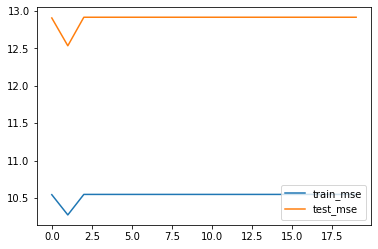

In [126]:
#————————————————————————————随机数种子为420————————————————————————————
# 创建随机数种子
torch.manual_seed(420)  

# 实例化模型
relu_model3 = ReLU_class3(bias=False)              

# 核心参数
num_epochs = 20
lr = 0.03

# 模型训练
train_l, test_l = model_train_test(relu_model3, 
                                   train_loader,
                                   test_loader,
                                   num_epochs = num_epochs, 
                                   criterion = nn.MSELoss(), 
                                   optimizer = optim.SGD, 
                                   lr = 0.03, 
                                   cla = False, 
                                   eva = mse_cal)

# 绘制图像，查看MSE变化情况
plt.plot(list(range(num_epochs)), train_l, label='train_mse')
plt.plot(list(range(num_epochs)), test_l, label='test_mse')
plt.legend(loc = 4)

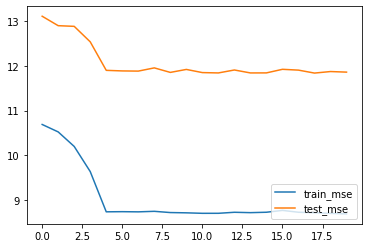

In [127]:
#————————————————————————————随机数种子为29————————————————————————————
# 创建随机数种子
torch.manual_seed(29)  

# 实例化模型
relu_model3 = ReLU_class3(bias=False)              

# 核心参数
num_epochs = 20
lr = 0.03

# 模型训练
train_l, test_l = model_train_test(relu_model3, 
                                   train_loader,
                                   test_loader,
                                   num_epochs = num_epochs, 
                                   criterion = nn.MSELoss(), 
                                   optimizer = optim.SGD, 
                                   lr = 0.03, 
                                   cla = False, 
                                   eva = mse_cal)

# 绘制图像，查看MSE变化情况
plt.plot(list(range(num_epochs)), train_l, label='train_mse')
plt.plot(list(range(num_epochs)), test_l, label='test_mse')
plt.legend(loc = 4)

我们发现，初始参数值的选取不仅会影响模型收敛速度，甚至在某些情况下还会影响模型的最终表现。

造成此现象的根本原因还是在于神经网络模型在进行训练时，不确定性过多，而在一个拥有诸多不确定性的系统中再加上不确定的初始参数，初始参数的不确定性会被这个系统放大。

并且，值得一提的是，每一个epoch中的每一次迭代并不是在一个损失函数上一步步下降的，当我们使用小批量梯度下降算法时，带入不同批的数据，实际创建的损失函数也会不同。